# Homework 2

In [1]:
# use Julia's packae managing module to activate your current environment
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `c:\Users\macca\JULIA\Assignment2\MyPkg\vision`
Precompiling project...
┌ Warning: attempting to remove probably stale pidfile
│   path = C:\Users\macca\.julia\compiled\v1.10\Plots\ld3vC_70wMv.ji.pidfile
└ @ FileWatching.Pidfile C:\Users\macca\AppData\Local\Programs\Julia-1.10.3\share\julia\stdlib\v1.10\FileWatching\src\pidfile.jl:244
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  3 dependencies successfully precompiled in 111 seconds. 264 already precompiled.


Objective:

- investigate normalization
- model LGN as a center-surround filter with normalization
- look at effect in image processing

In [2]:
# telling Julia to load modules that we need for our code, which have been specified as dependencies for our current package
Pkg.add("Images")
Pkg.add("ImageFiltering")
Pkg.add("Plots")
using Images, ImageFiltering
using TestImages
using Statistics
using Plots


    Updating registry at `C:\Users\macca\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Project.toml`
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Project.toml`
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Project.toml`
  No Changes to `C:\Users\macca\JULIA\Assignment2\MyPkg\vision\Manifest.toml`


In [3]:
# load the additional Utils module provided with the exercise
include("material/utils.jl")
using .Utils

Hello!

## LGN Model

- Model from Bonin, Mante & Carandini (2005), Journal of Neuroscience 25(47), 10844-10856.
- Hints: 
    - Check the paper for model parameters
    - Check the provided `utils.jl` for additional, helpful implementations
    - Dependent on your implementation, Julia's `mapwindow` function might be helpful for computing the summation part of `c_local`, or `imfilter` might be easier

In [5]:
# ...to be implemented:
function lgn(stimulus; standard_cell)
    r_f = customDoG(standard_cell[:σᶜᵉⁿ,:σˢʳᵈ,:kˢʳᵈ]) #Calculates Receptive Field as a DoG
    l = imfilter(stimulus,r_f) #Applies DoG to stimulus
    f_b = customDoG(standard_cell[:σᵘ, :σᵈ, :kᵈ]) #Calculates Filterbanks as DoG
    s_prime = imfilter(stimulus, f_b) #Applies DoG to Stimulus
    g_sf = kernel.Gaussian(standard_cell[:σˢᶠ]) #Used as a Gaussian window for the sum
    c_local = sqrt.(sum((s_prime^2).*g_sf)) #nonlinear operation for local contrast
    v = vᵐᵃˣ * (l./(standard_cell[:c⁵⁰] + c_local)) #calculation of first output
    r = maximum(v - standard_cell[:v⁰]) # rectification respect to threshold
    r_norm = normalize(r) #normalization
    return r_norm     
end

lgn (generic function with 1 method)

- Use of keyword arguments to make model easily parametrizable
- Large number of keyword arguments can be passed with a dictionary

In [8]:
# ...to be implemented: 
standard_cell = Dict([
    :vᵐᵃˣ => 212
    :v⁰ => -7.8
    :σᶜᵉⁿ => 0.5
    :σˢʳᵈ => 1.5
    :kˢʳᵈ => 0.9
    :σˢᶠ => 1.4
    :c⁵⁰ => 0.1
    :σᵘ => 0.3
    :σᵈ => 0.5
    :kᵈ => 0.5
])



0.5

## Testing the model

- As in the original paper, test the model with sine gratings
- Use `stimulus()` function from `utils.jl` to generate stimuli
- Original paper used moving stimuli; we will just use maximum response over stationary stimulus

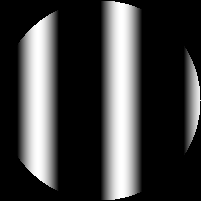

In [11]:
# ...to be implemented (optional): visualize the stimulus
ppd = Utils.ppd
st_1 = Utils.stimulus(;imsize=200, radius=10.0*ppd, θ=0.24/ppd)
Gray.(st_1)

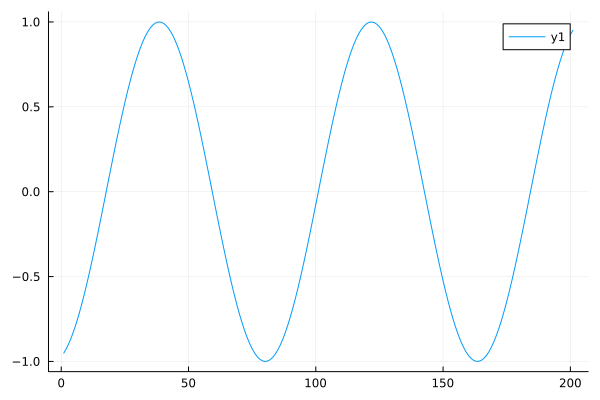

In [12]:
plot(st_1[101,:])

- First experiment: measure response for various contrast levels
- Observation in paper: saturating (sublinear) curve

In [12]:
# ...to be implemented: 

- Second experiment: measure response for increasing stimulus sizes
- Observation in paper: steep increase to optimal stimulus, then smaller decrease

In [13]:
# ...to be implemented: 

## Using the LGN model for image processing

In [14]:
# ...to be implemented: Load the testimage `lake`

- First experiment: **LGN model** with normalization

In [15]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

- Second experiment: use the **custom DoG-filter** from the model

In [16]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

- Third experiment: **standard DoG** center-surround filter

In [17]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

*...to be replaced:* What are the differences between the filters?